In [41]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [42]:
df = pd.read_csv('UCI_Credit_Card.csv')
df.sample(5)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
8697,8698,250000.0,2,1,2,30,0,0,0,0,...,153122.0,149564.0,152470.0,5560.0,6809.0,5443.0,5376.0,5665.0,6000.0,0
12978,12979,100000.0,1,2,1,44,0,0,2,0,...,2946.0,1473.0,3230.0,3000.0,0.0,0.0,0.0,3230.0,0.0,0
24427,24428,130000.0,1,3,2,30,0,0,0,-1,...,700.0,1680.0,0.0,1107.0,3025.0,707.0,1680.0,0.0,0.0,0
11326,11327,130000.0,2,1,2,29,-1,-1,0,0,...,97224.0,97940.0,99170.0,99235.0,4368.0,3449.0,3713.0,3610.0,3531.0,0
5745,5746,210000.0,2,1,2,27,0,0,0,0,...,9137.0,10637.0,3443.0,1500.0,1006.0,1500.0,1500.0,2600.0,99.0,0


# Data exploration

In [43]:
# Look for missing value
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
ID                            30000 non-null int64
LIMIT_BAL                     30000 non-null float64
SEX                           30000 non-null int64
EDUCATION                     30000 non-null int64
MARRIAGE                      30000 non-null int64
AGE                           30000 non-null int64
PAY_0                         30000 non-null int64
PAY_2                         30000 non-null int64
PAY_3                         30000 non-null int64
PAY_4                         30000 non-null int64
PAY_5                         30000 non-null int64
PAY_6                         30000 non-null int64
BILL_AMT1                     30000 non-null float64
BILL_AMT2                     30000 non-null float64
BILL_AMT3                     30000 non-null float64
BILL_AMT4                     30000 non-null float64
BILL_AMT5                     30000 non-null float64
BILL_AMT6   

In [44]:
# Dealing with categorical data
print(df['SEX'].value_counts())
print(df['MARRIAGE'].value_counts())
print(df['EDUCATION'].value_counts())

2    18112
1    11888
Name: SEX, dtype: int64
2    15964
1    13659
3      323
0       54
Name: MARRIAGE, dtype: int64
2    14030
1    10585
3     4917
5      280
4      123
6       51
0       14
Name: EDUCATION, dtype: int64


Marriage shouldn't be 0, should be 3

Education shouldn't be 0, also 5 and 6 are unknown value, should all be 4

In [45]:
# Payment delay
df[['PAY_0','PAY_2','PAY_3','PAY_4','PAY_5','PAY_6']].describe()

,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000
mean,-0.016700,-0.133767,-0.166200,-0.220667,-0.266200,-0.291100
std,1.123802,1.197186,1.196868,1.169139,1.133187,1.149988
min,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000
25%,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000


Setting -1 as "pay duty" is pretty strange

Also, -2 doesn't describe in the Information

Maybe it will be better to set 0 as "pay duty"

In [46]:
# Bill Statement
df[['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']].describe()

,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6
count,30000.000000,30000.000000,3.000000e+04,30000.000000,30000.000000,30000.000000
mean,51223.330900,49179.075167,4.701315e+04,43262.948967,40311.400967,38871.760400
std,73635.860576,71173.768783,6.934939e+04,64332.856134,60797.155770,59554.107537
min,-165580.000000,-69777.000000,-1.572640e+05,-170000.000000,-81334.000000,-339603.000000
25%,3558.750000,2984.750000,2.666250e+03,2326.750000,1763.000000,1256.000000
50%,22381.500000,21200.000000,2.008850e+04,19052.000000,18104.500000,17071.000000
75%,67091.000000,64006.250000,6.016475e+04,54506.000000,50190.500000,49198.250000
max,964511.000000,983931.000000,1.664089e+06,891586.000000,927171.000000,961664.000000


Negative value is quite strange to represent one's credit

In [47]:
df.LIMIT_BAL.describe()

count      30000.000000
mean      167484.322667
std       129747.661567
min        10000.000000
25%        50000.000000
50%       140000.000000
75%       240000.000000
max      1000000.000000
Name: LIMIT_BAL, dtype: float64

In [48]:
# Change the name of two columns
df = df.rename(columns={'default.payment.next.month': 'def_pay', 'PAY_0': 'PAY_1'})
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,def_pay
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [49]:
df = df.drop(columns='ID')
df.to_csv('UCI_Credit_Card_Rename.csv',index=False)

In [12]:
# Overall payment distribution
print(df.def_pay.value_counts())
print(df.def_pay.value_counts()[0] / len(df.def_pay))
print(df.def_pay.value_counts()[1] / len(df.def_pay))

0    23364
1     6636
Name: def_pay, dtype: int64
0.7788
0.2212


# Data Cleaning

In [13]:
msk = (df.EDUCATION == 0) | (df.EDUCATION == 5) | (df.EDUCATION == 6)
df.loc[msk, 'EDUCATION'] = 4
df.EDUCATION.value_counts()

2    14030
1    10585
3     4917
4      468
Name: EDUCATION, dtype: int64

In [14]:
df.loc[df.MARRIAGE == 0, 'MARRIAGE'] = 3
df.MARRIAGE.value_counts()

2    15964
1    13659
3      377
Name: MARRIAGE, dtype: int64

In [15]:
df.loc[df.PAY_1 <= 0, 'PAY_1'] = 0
df.loc[df.PAY_2 <= 0, 'PAY_2'] = 0
df.loc[df.PAY_3 <= 0, 'PAY_3'] = 0
df.loc[df.PAY_4 <= 0, 'PAY_4'] = 0
df.loc[df.PAY_5 <= 0, 'PAY_5'] = 0
df.loc[df.PAY_6 <= 0, 'PAY_6'] = 0
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,def_pay
0,1,20000.0,2,2,1,24,2,2,0,0,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,0,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,0,0,0,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


# Feature analysis

In [16]:
Gender = pd.crosstab(df.SEX, df.def_pay)
Gender['pro'] = (Gender[1] / (Gender[0] + Gender[1]))
Gender

def_pay,0,1,pro
SEX,,,
1,9015,2873,0.241672
2,14349,3763,0.207763


More women than man

Man are more likely to pay default next month

In [17]:
Education = pd.crosstab(df.EDUCATION, df.def_pay)
Education['pro'] = (Education[1] / (Education[0] + Education[1]))
Education

def_pay,0,1,pro
EDUCATION,,,
1,8549,2036,0.192348
2,10700,3330,0.237349
3,3680,1237,0.251576
4,435,33,0.070513


Higher the education level, lower the chance to pay default next month

In [18]:
Marriage = pd.crosstab(df.MARRIAGE, df.def_pay)
Marriage['pro'] = (Marriage[1] / (Marriage[0] + Marriage[1]))
Marriage

def_pay,0,1,pro
MARRIAGE,,,
1,10453,3206,0.234717
2,12623,3341,0.209283
3,288,89,0.236074


Married people and 'other' people more tend to pay default next month

In [19]:
Pay = df[['PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']]

In [20]:
df.corr()['def_pay']

ID          -0.013952
LIMIT_BAL   -0.153520
SEX         -0.039961
EDUCATION    0.033842
MARRIAGE    -0.027575
AGE          0.013890
PAY_1        0.396019
PAY_2        0.327093
PAY_3        0.286999
PAY_4        0.269055
PAY_5        0.260850
PAY_6        0.244437
BILL_AMT1   -0.019644
BILL_AMT2   -0.014193
BILL_AMT3   -0.014076
BILL_AMT4   -0.010156
BILL_AMT5   -0.006760
BILL_AMT6   -0.005372
PAY_AMT1    -0.072929
PAY_AMT2    -0.058579
PAY_AMT3    -0.056250
PAY_AMT4    -0.056827
PAY_AMT5    -0.055124
PAY_AMT6    -0.053183
def_pay      1.000000
Name: def_pay, dtype: float64

BILL_AMT and PAY_AMT seems not correlated with the def_pay

In [21]:
from sklearn import preprocessing

# Preprocessing

### take logarithm to continues data

In [22]:
for i in range(1,7):
    df['log_PAY_AMT'+str(i)] = df['PAY_AMT'+str(i)].apply(lambda x: np.log1p(x) if (x>0) else 0)
    
for i in range(1,7):
    df['log_BILL_AMT'+str(i)] = df['BILL_AMT'+str(i)].apply(lambda x: np.log1p(x) if (x>0) else 0)

In [23]:
df.corr()['def_pay']

ID              -0.013952
LIMIT_BAL       -0.153520
SEX             -0.039961
EDUCATION        0.033842
MARRIAGE        -0.027575
AGE              0.013890
PAY_1            0.396019
PAY_2            0.327093
PAY_3            0.286999
PAY_4            0.269055
PAY_5            0.260850
PAY_6            0.244437
BILL_AMT1       -0.019644
BILL_AMT2       -0.014193
BILL_AMT3       -0.014076
BILL_AMT4       -0.010156
BILL_AMT5       -0.006760
BILL_AMT6       -0.005372
PAY_AMT1        -0.072929
PAY_AMT2        -0.058579
PAY_AMT3        -0.056250
PAY_AMT4        -0.056827
PAY_AMT5        -0.055124
PAY_AMT6        -0.053183
def_pay          1.000000
log_PAY_AMT1    -0.170300
log_PAY_AMT2    -0.150030
log_PAY_AMT3    -0.139197
log_PAY_AMT4    -0.126043
log_PAY_AMT5    -0.109828
log_PAY_AMT6    -0.111352
log_BILL_AMT1   -0.024446
log_BILL_AMT2   -0.012791
log_BILL_AMT3   -0.011119
log_BILL_AMT4   -0.010443
log_BILL_AMT5   -0.013156
log_BILL_AMT6   -0.004934
Name: def_pay, dtype: float64

even with logarithm log_BILL_AMT still seems too irrelavent to def_pay

### make better feature from categorical data

In [24]:
df['SEX_MAR'] = 0
df.loc[((df.SEX == 1)&(df.MARRIAGE == 1)), 'SEX_MAR'] = 1 # married man
df.loc[((df.SEX == 1)&(df.MARRIAGE == 2)), 'SEX_MAR'] = 2 # single man
df.loc[((df.SEX == 1)&(df.MARRIAGE == 3)), 'SEX_MAR'] = 3 # other man
df.loc[((df.SEX == 2)&(df.MARRIAGE == 1)), 'SEX_MAR'] = 4 # married woman
df.loc[((df.SEX == 2)&(df.MARRIAGE == 2)), 'SEX_MAR'] = 5 # single woman
df.loc[((df.SEX == 2)&(df.MARRIAGE == 3)), 'SEX_MAR'] = 6 # other woman

In [25]:
SEX_MAR = pd.crosstab(df.SEX_MAR, df.def_pay)
SEX_MAR['pro'] = (SEX_MAR[1] / (SEX_MAR[0] + SEX_MAR[1]))
SEX_MAR

def_pay,0,1,pro
SEX_MAR,,,
1,3844,1346,0.259345
2,5068,1485,0.226614
3,103,42,0.289655
4,6609,1860,0.219625
5,7555,1856,0.197216
6,185,47,0.202586


In [26]:
df.corr()['def_pay'][{'SEX', 'MARRIAGE', 'SEX_MAR'}]

SEX        -0.039961
SEX_MAR    -0.047314
MARRIAGE   -0.027575
Name: def_pay, dtype: float64

Combining 2 feature performe little be better than seperately

## AGE

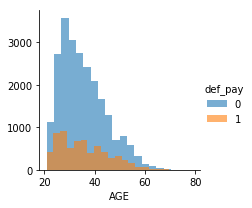

In [27]:
fig = sns.FacetGrid(df, hue='def_pay')
fig.map(plt.hist, 'AGE', alpha=0.6, bins=20)
fig.add_legend()

In [28]:
df.AGE.describe()

count    30000.000000
mean        35.485500
std          9.217904
min         21.000000
25%         28.000000
50%         34.000000
75%         41.000000
max         79.000000
Name: AGE, dtype: float64

In [29]:
df['AGE_Q'] = 1
df.loc[((df['AGE'] >= 24) & (df['AGE'] < 28) ), 'AGE_Q'] = 2
df.loc[((df['AGE'] >= 28) & (df['AGE'] < 31) ), 'AGE_Q'] = 3
df.loc[((df['AGE'] >= 31) & (df['AGE'] < 34) ), 'AGE_Q'] = 4
df.loc[((df['AGE'] >= 34) & (df['AGE'] < 37) ), 'AGE_Q'] = 5
df.loc[((df['AGE'] >= 37) & (df['AGE'] < 41) ), 'AGE_Q'] = 6
df.loc[(df['AGE'] >= 41), 'AGE_Q'] = 7

AGE = pd.crosstab(df.AGE_Q, df.def_pay)
AGE['pro'] = (AGE[1] / (AGE[0] + AGE[1]))
print(AGE)
df.corr()['def_pay'][{'AGE', 'AGE_Q'}]

def_pay     0     1       pro
AGE_Q                        
1        1128   430  0.275995
2        3878  1168  0.231470
3        3536   873  0.198004
4        2852   669  0.190003
5        2672   711  0.210168
6        3000   809  0.212392
7        6298  1976  0.238820


AGE_Q    0.00300
AGE      0.01389
Name: def_pay, dtype: float64

Even worse after modified AGE

In [30]:
df.corr()['def_pay']

ID              -0.013952
LIMIT_BAL       -0.153520
SEX             -0.039961
EDUCATION        0.033842
MARRIAGE        -0.027575
AGE              0.013890
PAY_1            0.396019
PAY_2            0.327093
PAY_3            0.286999
PAY_4            0.269055
PAY_5            0.260850
PAY_6            0.244437
BILL_AMT1       -0.019644
BILL_AMT2       -0.014193
BILL_AMT3       -0.014076
BILL_AMT4       -0.010156
BILL_AMT5       -0.006760
BILL_AMT6       -0.005372
PAY_AMT1        -0.072929
PAY_AMT2        -0.058579
PAY_AMT3        -0.056250
PAY_AMT4        -0.056827
PAY_AMT5        -0.055124
PAY_AMT6        -0.053183
def_pay          1.000000
log_PAY_AMT1    -0.170300
log_PAY_AMT2    -0.150030
log_PAY_AMT3    -0.139197
log_PAY_AMT4    -0.126043
log_PAY_AMT5    -0.109828
log_PAY_AMT6    -0.111352
log_BILL_AMT1   -0.024446
log_BILL_AMT2   -0.012791
log_BILL_AMT3   -0.011119
log_BILL_AMT4   -0.010443
log_BILL_AMT5   -0.013156
log_BILL_AMT6   -0.004934
SEX_MAR         -0.047314
AGE_Q       

In [31]:
dfNew = df[['EDUCATION','AGE','SEX_MAR','PAY_1','PAY_2','PAY_3','PAY_4','PAY_5','PAY_6','LIMIT_BAL','log_PAY_AMT1','log_PAY_AMT2','log_PAY_AMT3','log_PAY_AMT4','log_PAY_AMT5','log_PAY_AMT6', 'def_pay']]
dfNew.to_csv('UCI_Credit_Card_New.csv',index=False)